In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df= pd.read_csv("D:\\2022\\food_claims.csv")
df


,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause
0,1,317,R$ 74474.55,51231.37,RECIFE,15,False,unknown
1,2,195,R$ 52137.83,42111.30,FORTALEZA,12,True,unknown
2,3,183,R$ 24447.2,23986.30,SAO LUIS,10,True,meat
3,4,186,R$ 29006.28,27942.72,FORTALEZA,11,False,meat
4,5,138,R$ 19520.6,16251.06,RECIFE,11,False,vegetable
...,...,...,...,...,...,...,...,...
1995,1996,176,R$ 28982.3,24265.02,RECIFE,10,False,meat
1996,1997,166,R$ 5188.44,4772.77,FORTALEZA,2,True,meat
1997,1998,179,R$ 11975.85,10087.81,RECIFE,4,True,meat
1998,1999,162,R$ 23516.28,23310.24,RECIFE,9,False,meat


In [4]:
df.isna().sum()
df['amount_paid'] = df['amount_paid'].fillna(df['amount_paid'].mode()[0])
print(set(df['linked_cases']))
df['linked_cases'] = df['linked_cases'].fillna(False)
df.isna().sum()

{False, True}


In [3]:
df['linked_cases'] = df['linked_cases'].fillna(False)

claim_id                0
time_to_close           0
claim_amount            0
amount_paid             0
location                0
individuals_on_claim    0
linked_cases            0
cause                   0
dtype: int64

Text(0.5, 1.0, 'CLAIMS BY LOCATION')

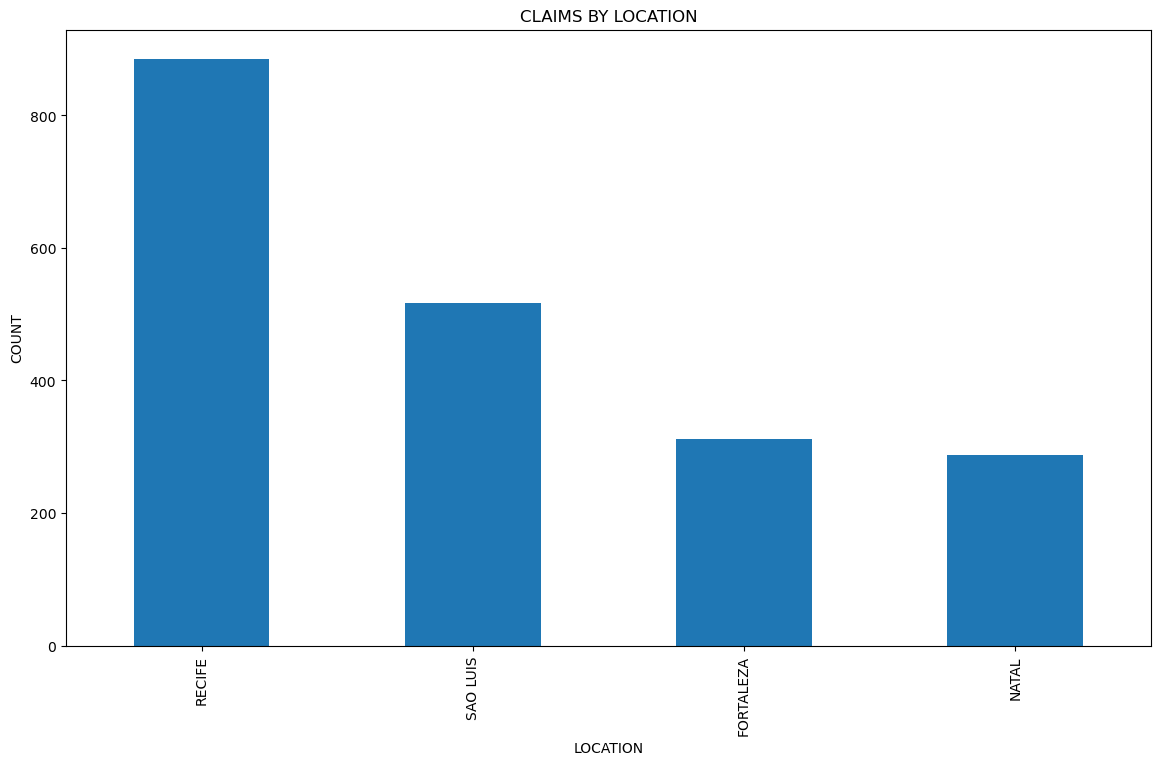

In [24]:
fig, ax = plt.subplots()
ax = df['location'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number for each location")
ax.set_xlabel("LOCATION")
ax.set_ylabel("COUNT")
plt.title('CLAIMS BY LOCATION')

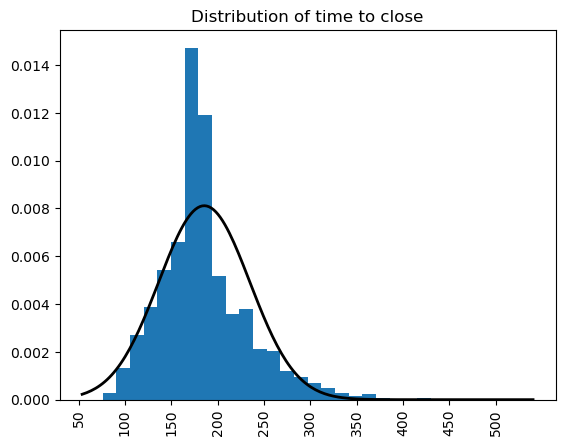

In [49]:
from scipy.stats import norm

plt.clf()
plt.hist(df['time_to_close'], bins=30,density=True)

mean_ttc = df['time_to_close'].mean()
std_ttc = df['time_to_close'].std()
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 200)

p = norm.pdf(x=x, loc=mean_ttc, scale=std_ttc)

plt.plot(x, p, 'k', linewidth=2)
plt.title('Distribution of time to close')

plt.xticks(np.arange(int(xmin) - 3, int(xmax), 50), rotation=90)

plt.show()

In [28]:
from scipy.stats import shapiro
stats, p = shapiro(df['time_to_close'])

print(f'p-value: {p}')

alpha = 0.05
if p < alpha:
    print(f'we reject the null hypothesis that the data is normal with a p-value of {p}.')
else:
    print(f'we fail to reject the null hypothesis that the data is normal with a p-value of {p}.')

p-value: 1.1802920604855076e-30
we reject the null hypothesis that the data is normal with a p-value of 1.1802920604855076e-30.


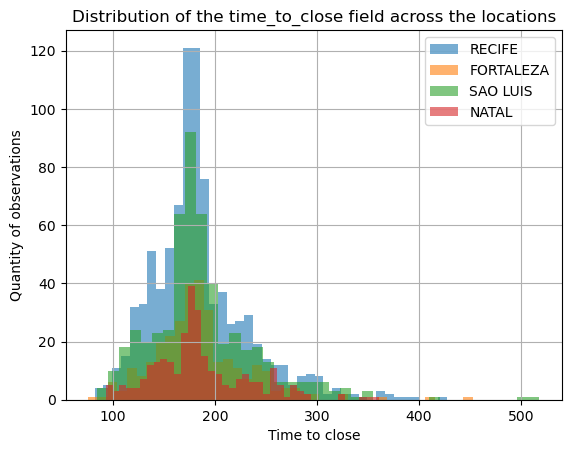

In [46]:
locations = df.location.unique()

for location in locations:
    df.loc[df['location'] == location, 'time_to_close'].hist(bins=40, alpha=0.6, label=location)

plt.title('Distribution of the time_to_close field across the locations')
plt.xlabel('Time to close')
plt.ylabel('Quantity of observations')
plt.legend()

Text(0.5, 0, 'Location')

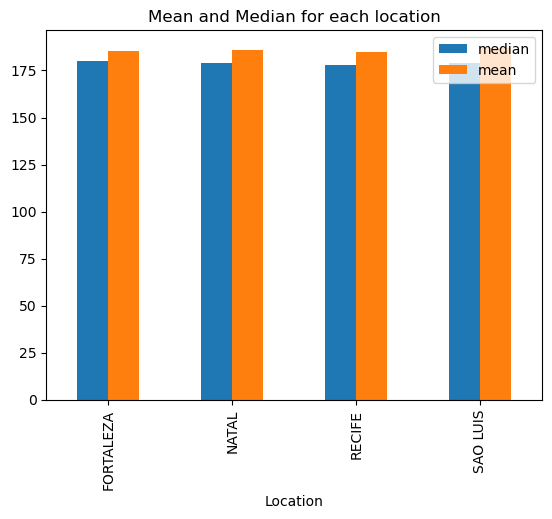

In [40]:
mean_and_median_time_by_city = df.groupby('location')['time_to_close'].agg(func={np.median, np.mean})
mean_and_median_time_by_city.plot(kind='bar')
plt.title('Mean and Median for each location')
plt.xlabel('Location')

Text(0.5, 1.0, '')

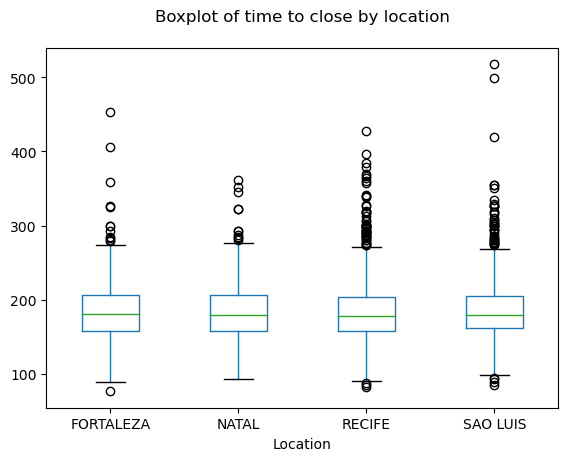

In [41]:
df[['time_to_close', 'location']].boxplot(column='time_to_close', by='location', grid=False)
plt.suptitle('Boxplot of time to close by location')
plt.xlabel('Location')
plt.title('')

In [54]:
!pip install pingouin
import pingouin
alpha = 0.05
pingouin.kruskal(data=df, dv='time_to_close', between='location')


,Source,ddof1,H,p-unc
Kruskal,location,3,1.153223,0.764244
